In [1]:
import pandas as pd
import numpy as np


load the data

In [2]:
train_data = pd.read_csv('../data/BBC News Train.csv')
test_data = pd.read_csv('../data/BBC News Test.csv')
datasets = [train_data, test_data]
print(test_data.head())

   ArticleId                                               Text  Category
0       1018  qpr keeper day heads for preston queens park r...     sport
1       1319  software watching while you work software that...      tech
2       1138  d arcy injury adds to ireland woe gordon d arc...     sport
3        459  india s reliance family feud heats up the ongo...  business
4       1020  boro suffer morrison injury blow middlesbrough...     sport


In [3]:
# check for missing values : 
for df in datasets:
    print(df.isna().value_counts())

ArticleId  Text   Category
False      False  False       1490
Name: count, dtype: int64
ArticleId  Text   Category
False      False  False       735
Name: count, dtype: int64


preprocessing

In [4]:
for df in datasets:
    df.set_index('ArticleId', inplace=True)
    
    # topic encoding:
    # Tech, Sport, Business, Entertainment or Politics
    topic_encoder = {'tech':1, 'sport':2, 'business':3, 'entertainment':4, 'politics':5}
    df['Category'] = df['Category'].map(topic_encoder).astype(int)

X = TFI-DF vectorization of the article. 
y = 'Category' column

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

train_data = datasets[0]
test_data = datasets[1]

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
print(train_data['Text'])
X = tfidf_vectorizer.fit_transform(train_data['Text'])
y = train_data['Category']

X_test = tfidf_vectorizer.transform(test_data['Text'])
y_test = test_data['Category']

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


ArticleId
1833    worldcom ex-boss launches defence lawyers defe...
154     german business confidence slides german busin...
1101    bbc poll indicates economic gloom citizens in ...
1976    lifestyle  governs mobile choice  faster  bett...
917     enron bosses in $168m payout eighteen former e...
                              ...                        
857     double eviction from big brother model caprice...
325     dj double act revamp chart show dj duo jk and ...
1590    weak dollar hits reuters revenues at media gro...
1587    apple ipod family expands market apple has exp...
538     santy worm makes unwelcome visit thousands of ...
Name: Text, Length: 1490, dtype: object


In [6]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X,y)

test_pred = model.predict(X_test)

print(test_pred[:10])

[2 1 2 3 2 2 5 5 4 3]


Learning Curve


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


AttributeError: module 'matplotlib' has no attribute 'show'

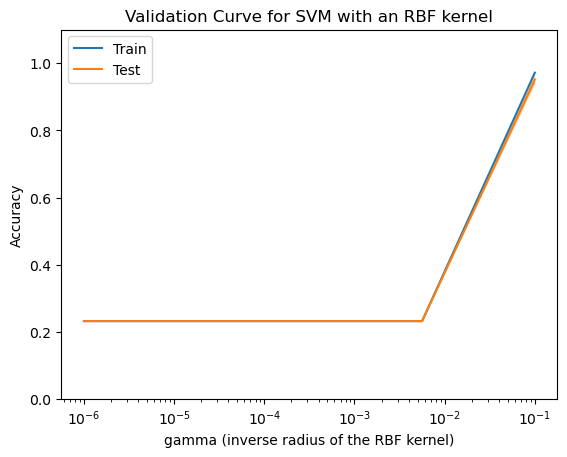

In [7]:
from sklearn.model_selection import ValidationCurveDisplay
import matplotlib as plt

disp = ValidationCurveDisplay.from_estimator(
    SVC(),
    X,
    y,
    param_name="gamma",
    param_range=np.logspace(-6, -1, 5),
    score_type="both",
    n_jobs=2,
    score_name="Accuracy",
)
disp.ax_.set_title("Validation Curve for SVM with an RBF kernel")
disp.ax_.set_xlabel(r"gamma (inverse radius of the RBF kernel)")
disp.ax_.set_ylim(0.0, 1.1)
plt.show()

Evaluation

In [ ]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, test_pred)
print(f'accuracy on the test set : {100 * score:.2f}%')

accuracy on the test set : 97.41%


Save the model using Pickle

In [ ]:
import pickle

pickle.dump(model, open('../results/topic_classifier.pkl', 'wb'))

#how to load and use the model :
#pickled_model = pickle.load(open('model.pkl', 'rb'))
#pickled_model.predict(X)
